# **Variational Autoencoder (VAE) and Reparameterization Trick**

---

### **1️⃣ VAE Overview**

Given a dataset:

$$
D = \{ x_i \}_{i=1}^N, \quad x_i \sim p_{\text{data}}(x)
$$

We define a **latent variable model**:

$$
p_\theta(x) = \int p_\theta(x, z) \, dz
$$

Where:

- \( z \) = latent variable  
- \( \theta \) = parameters of generative model  

---

### **2️⃣ Variational Lower Bound (ELBO)**

Directly maximizing \( \log p_\theta(x) \) is **intractable**.  
We introduce an **approximate posterior** \( q_\phi(z|x) \) and derive the **ELBO**:

$$
\log p_\theta(x)
= \log \mathbb{E}_{q_\phi(z|x)} \Big[ \frac{p_\theta(x,z)}{q_\phi(z|x)} \Big]
\ge
\mathbb{E}_{q_\phi(z|x)} \Big[ \log p_\theta(x,z) - \log q_\phi(z|x) \Big]
$$

---

### **3️⃣ ELBO Decomposition**

$$
\text{ELBO}(\theta, \phi)
= \mathbb{E}_{q_\phi(z|x)}[\log p_\theta(x|z)]
- KL(q_\phi(z|x) \| p(z))
$$

- **Reconstruction term:** forces decoder to reconstruct \( x \)  
- **KL divergence term:** regularizes \( q_\phi(z|x) \) towards prior \( p(z) \)

---

### **4️⃣ Reparameterization Trick**

We cannot backpropagate through **stochastic sampling** directly.  
We **reparameterize**:

$$
z \sim q_\phi(z|x) = \mathcal{N}(\mu_\phi(x), \sigma_\phi^2(x))
$$

Instead of sampling \( z \) directly:

$$
\epsilon \sim \mathcal{N}(0, I), \quad
z = \mu_\phi(x) + \sigma_\phi(x) \odot \epsilon
$$

This allows gradients to flow through \( \mu_\phi \) and \( \sigma_\phi \).

---

### **5️⃣ VAE Architecture**

- **Encoder (Recognition Model):** outputs $$ \mu_\phi(x), \sigma_\phi(x) $$  
- **Decoder (Generative Model):** outputs $$ p_\theta(x|z) $$  



# **Variational Autoencoder (VAE) and Reparameterization Trick**

---

## **1️⃣ VAE Overview**

Given a dataset:

$$
D = \{ x_i \}_{i=1}^N, \quad x_i \sim p_{\text{data}}(x)
$$

We define a **latent variable model**:

$$
p_\theta(x) = \int p_\theta(x,z) \, dz
$$

Where:

- $$ z $$ is the **latent variable**
- $$ \theta $$ are the **parameters of the generative model**

---



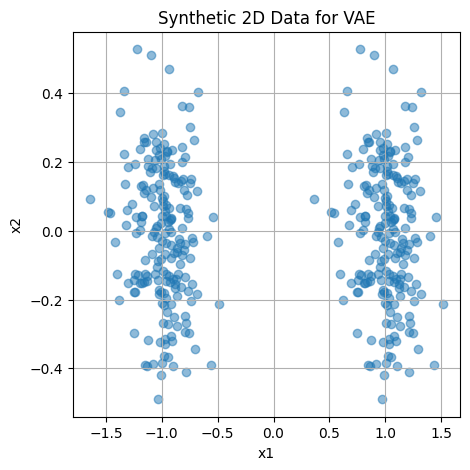

In [7]:
# 1️⃣ Generate Synthetic 2D Data
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random

key = random.PRNGKey(0)
num_samples = 200

# Two clusters (blobs) in 2D
cluster1 = random.normal(key, (num_samples,2)) * 0.2 + jnp.array([1,0])
cluster2 = random.normal(key, (num_samples,2)) * 0.2 + jnp.array([-1,0])
X_data = jnp.concatenate([cluster1, cluster2], axis=0)

plt.figure(figsize=(5,5))
plt.scatter(X_data[:,0], X_data[:,1], alpha=0.5)
plt.title("Synthetic 2D Data for VAE")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


## **2️⃣ Variational Lower Bound (ELBO)**

Directly maximizing the log-likelihood:

$$
\log p_\theta(x) = \log \int p_\theta(x,z) \, dz
$$

is **intractable**.

We introduce an **approximate posterior** $$ q_\phi(z|x) $$ and apply **Jensen's inequality**:

$$
\log p_\theta(x)
= \log \mathbb{E}_{q_\phi(z|x)} \Big[ \frac{p_\theta(x,z)}{q_\phi(z|x)} \Big]
\ge \mathbb{E}_{q_\phi(z|x)} \big[ \log p_\theta(x,z) - \log q_\phi(z|x) \big]
$$

This lower bound is called the **Evidence Lower Bound (ELBO)**:

$$
\text{ELBO}(\theta, \phi)
= \mathbb{E}_{q_\phi(z|x)}[ \log p_\theta(x|z) ] - \text{KL}(q_\phi(z|x)\|p(z))
$$

- **Reconstruction term**: forces decoder to reconstruct $$x$$  
- **KL divergence term**: regularizes $$q_\phi(z|x)$$ towards prior $$p(z)$$


In [8]:
# 2️⃣ Define Encoder (Linear Demo for Visualization)
def encoder(x):
    """Takes x and outputs mu and logvar for q_phi(z|x)"""
    mu = jnp.dot(x, jnp.array([[0.5, -0.3],[0.2,0.4]]))  # shape [N,2]
    logvar = jnp.dot(x, jnp.array([[0.1,-0.2],[-0.3,0.3]]))  # shape [N,2]
    return mu, logvar

mu, logvar = encoder(X_data)
print("Step 1: Encoder outputs")
print("Mu (first 5):\n", mu[:5])
print("Logvar (first 5):\n", logvar[:5])


Step 1: Encoder outputs
Mu (first 5):
 [[ 0.7432748  -0.23533738]
 [ 0.45349586 -0.28027374]
 [ 0.47872555 -0.3883326 ]
 [ 0.47024527 -0.2307318 ]
 [ 0.5284284  -0.41587406]]
Logvar (first 5):
 [[ 0.01093695 -0.14338979]
 [ 0.09604515 -0.18737325]
 [ 0.16184717 -0.265369  ]
 [ 0.06043131 -0.15052533]
 [ 0.1702968  -0.2835838 ]]


## **3️⃣ Reparameterization Trick**

We cannot backpropagate through stochastic sampling directly.  

So we reparameterize:

$$
z \sim q_\phi(z|x) = \mathcal{N}(\mu_\phi(x), \sigma_\phi^2(x))
$$

Instead of sampling $$z$$ directly:

$$
\epsilon \sim \mathcal{N}(0,I), \quad
z = \mu_\phi(x) + \sigma_\phi(x) \odot \epsilon
$$

This allows **gradients to flow** through $$ \mu_\phi $$ and $$ \sigma_\phi $$.


Step 2: Sampled latent z (first 5):
 [[-1.7125741  -2.130179  ]
 [ 0.6691517  -0.6022053 ]
 [-0.34747374 -1.4204391 ]
 [-0.71319795  0.04488941]
 [-0.8985862   1.4327197 ]]


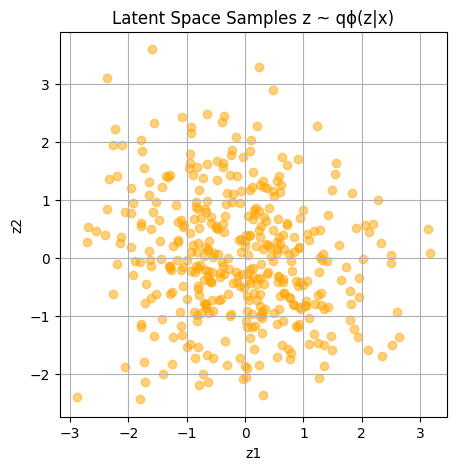

In [9]:
# 3️⃣ Reparameterization Trick
def sample_latent(mu, logvar, key):
    eps = random.normal(key, mu.shape)
    return mu + jnp.exp(0.5 * logvar) * eps

key, subkey = random.split(key)
z = sample_latent(mu, logvar, subkey)

print("Step 2: Sampled latent z (first 5):\n", z[:5])

plt.figure(figsize=(5,5))
plt.scatter(z[:,0], z[:,1], alpha=0.5, color='orange')
plt.title("Latent Space Samples z ~ qϕ(z|x)")
plt.xlabel("z1")
plt.ylabel("z2")
plt.grid(True)
plt.show()


## **4️⃣ Decoder (Generative Model)**

The **decoder** maps latent $$ z $$ back to the input space:

$$
p_\theta(x|z) = \mathcal{N}(x; \hat{x}_\theta(z), I)
$$

- Output of the decoder is $$ \hat{x}_\theta(z) $$

The ELBO is:

$$
\mathbb{E}_{q_\phi(z|x)}[\log p_\theta(x|z)] - \text{KL}(q_\phi(z|x)\|p(z))
$$


Step 3: Decoder reconstructions (first 5):
 [[-1.8378556   0.43025127]
 [ 0.2877446  -0.4550169 ]
 [-0.6693634  -0.11035096]
 [-0.48577172  0.36557686]
 [-0.19919439  0.73583704]]


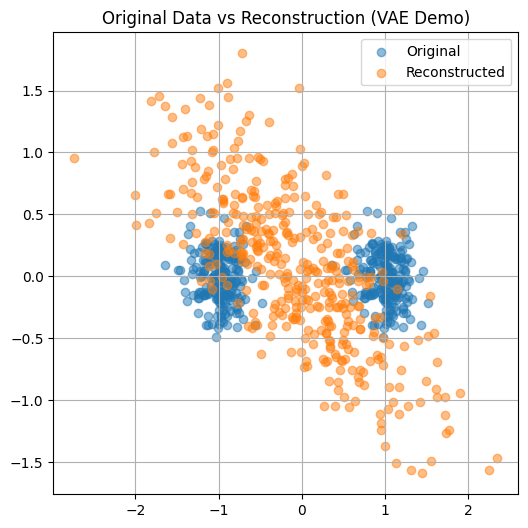

In [10]:
# 4️⃣ Define Decoder
def decoder(z):
    """Map latent z back to input space"""
    return jnp.dot(z, jnp.array([[0.7,-0.5],[0.3,0.2]]))

X_recon = decoder(z)
print("Step 3: Decoder reconstructions (first 5):\n", X_recon[:5])

plt.figure(figsize=(6,6))
plt.scatter(X_data[:,0], X_data[:,1], alpha=0.5, label='Original')
plt.scatter(X_recon[:,0], X_recon[:,1], alpha=0.5, label='Reconstructed')
plt.legend()
plt.title("Original Data vs Reconstruction (VAE Demo)")
plt.grid(True)
plt.show()


## **5️⃣ Connecting Concept to Code**

1. **Encoder Step:** Compute $$\mu_\phi(x)$$ and $$\log\sigma_\phi^2(x)$$ ✅
2. **Reparameterization:** Sample $$z = \mu + \sigma \cdot \epsilon$$ ✅
3. **Decoder Step:** Map $$z$$ back to $$\hat{x}$$ ✅
4. **Visualization:** Compare original $$x$$ and reconstructed $$\hat{x}$$ ✅

This shows **how a VAE learns to compress data to latent space and reconstruct it**.


# **Text Variational Autoencoder (Text VAE)**

---

### **1️⃣ Problem Setup**

Given a dataset of text sequences:

$$
D = \{ x_1, x_2, ..., x_N \}, \quad x_i \in \text{Vocabulary}^L
$$

We define a **latent variable model**:

$$
p_\theta(x) = \int p_\theta(x,z) \, dz
$$

Where:

- \( z \) = latent vector (continuous)
- \( \theta \) = parameters of the **Decoder (generative model)**

---

### **2️⃣ ELBO Objective**

The VAE maximizes:

$$
\text{ELBO}(x) =
\mathbb{E}_{q_\phi(z|x)} [ \log p_\theta(x|z) ]
-
KL(q_\phi(z|x) \| p(z))
$$

- **Encoder \( q_\phi(z|x) \):** maps text to latent vector  
- **Decoder \( p_\theta(x|z) \):** generates text from latent vector  

---

### **3️⃣ Training Intuition**

1. **Encode** text → latent \( z \)  
2. **Sample** \( z = \mu(x) + \sigma(x) \odot \epsilon \)  
3. **Decode** latent to reconstruct the text  
4. Minimize **Reconstruction + KL Loss**  


Vocabulary: ['autoencoder', 'cool', 'deep', 'fast', 'i', 'is', 'jax', 'latent', 'learning', 'learns', 'like', 'makes', 'ml', 'space', 'vae', 'variational', 'with']
Encoded data:
 [[ 4 10  2  8]
 [ 6 11 12  3]
 [15  0  5  1]
 [ 2  8 16  6]
 [14  9  7 13]]
One-hot shape: (5, 4, 17)
Epoch 0: Loss=12.0754 Recon=12.0502 KL=0.0251
Epoch 20: Loss=6.2360 Recon=6.0088 KL=0.2272
Epoch 40: Loss=4.6260 Recon=3.3209 KL=1.3051
Epoch 60: Loss=3.3482 Recon=1.2761 KL=2.0721
Epoch 80: Loss=4.4890 Recon=2.5373 KL=1.9517


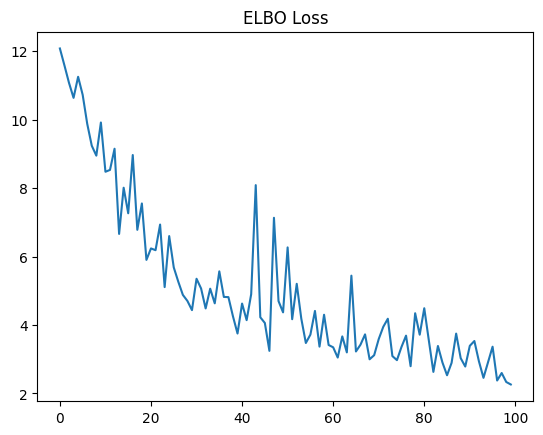

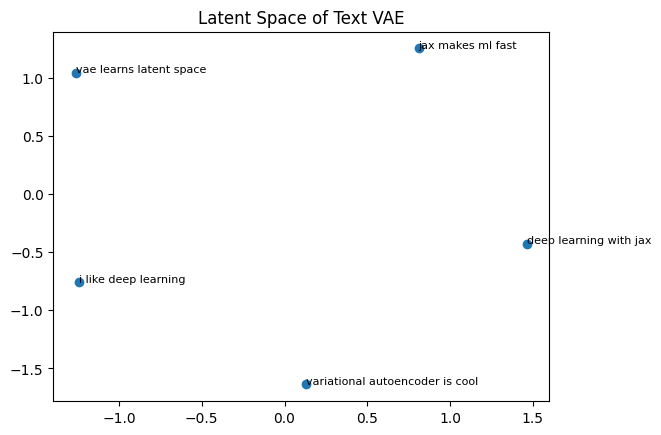

In [3]:
# !pip install flax optax jax jaxlib tensorflow-datasets matplotlib sklearn --quiet

import jax
import jax.numpy as jnp
from flax import linen as nn
import optax
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# ----------------- 1️⃣ Toy Text Dataset -----------------
corpus = [
    "i like deep learning",
    "jax makes ml fast",
    "variational autoencoder is cool",
    "deep learning with jax",
    "vae learns latent space"
]
vocab = sorted(set(" ".join(corpus).split()))
stoi = {w:i for i,w in enumerate(vocab)}
itos = {i:w for w,i in stoi.items()}
vocab_size = len(vocab)
seq_len = max(len(s.split()) for s in corpus)

def encode_sentence(s):
    tokens = s.split()
    ids = [stoi[t] for t in tokens] + [0]*(seq_len-len(tokens))
    return np.array(ids)

data = np.stack([encode_sentence(s) for s in corpus])
print("Vocabulary:", vocab)
print("Encoded data:\n", data)

# ----------------- 2️⃣ One-hot Encoding -----------------
def one_hot(batch, vocab_size):
    return (np.arange(vocab_size) == batch[...,None]).astype(np.float32)

data_oh = one_hot(data, vocab_size)
print("One-hot shape:", data_oh.shape)  # (num_sentences, seq_len, vocab_size)

# ----------------- 3️⃣ Define Text VAE -----------------
latent_dim = 2  # 2D latent for visualization

class Encoder(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = x.reshape((x.shape[0], -1))  # flatten
        x = nn.Dense(32)(x); x = nn.relu(x)
        mu = nn.Dense(latent_dim)(x)
        logvar = nn.Dense(latent_dim)(x)
        return mu, logvar

class Decoder(nn.Module):
    @nn.compact
    def __call__(self, z):
        x = nn.Dense(32)(z); x = nn.relu(x)
        x = nn.Dense(seq_len*vocab_size)(x)
        return nn.log_softmax(x.reshape((-1, seq_len, vocab_size)))

encoder = Encoder()
decoder = Decoder()
key = jax.random.PRNGKey(0)
params_enc = encoder.init(key, jnp.ones((1,seq_len,vocab_size)))
params_dec = decoder.init(key, jnp.ones((1,latent_dim)))

# ----------------- 4️⃣ VAE Loss -----------------
def sample_latent(mu, logvar, key):
    eps = jax.random.normal(key, mu.shape)
    return mu + jnp.exp(0.5*logvar) * eps

def vae_loss(params_enc, params_dec, x, key):
    mu, logvar = encoder.apply(params_enc, x)
    z = sample_latent(mu, logvar, key)
    logits = decoder.apply(params_dec, z)

    recon_loss = -jnp.mean(jnp.sum(x * logits, axis=(1,2)))  # cross-entropy
    kl_loss = -0.5*jnp.mean(jnp.sum(1+logvar-mu**2-jnp.exp(logvar), axis=1))
    return recon_loss + kl_loss, (recon_loss, kl_loss, mu)

opt = optax.adam(1e-2)
opt_state_enc = opt.init(params_enc)
opt_state_dec = opt.init(params_dec)

# ----------------- 5️⃣ Training -----------------
losses = []
for epoch in range(100):
    key, subkey = jax.random.split(key)
    x = jnp.array(data_oh)
    (loss_val,(recon,kl,mu)), grads = jax.value_and_grad(vae_loss, argnums=(0,1), has_aux=True)(params_enc, params_dec, x, subkey)
    updates_enc, opt_state_enc = opt.update(grads[0], opt_state_enc)
    updates_dec, opt_state_dec = opt.update(grads[1], opt_state_dec)
    params_enc = optax.apply_updates(params_enc, updates_enc)
    params_dec = optax.apply_updates(params_dec, updates_dec)

    if epoch%20==0:
        print(f"Epoch {epoch}: Loss={loss_val:.4f} Recon={recon:.4f} KL={kl:.4f}")
    losses.append(loss_val)

plt.plot(losses); plt.title("ELBO Loss"); plt.show()

# ----------------- 6️⃣ Visualize Latent Space -----------------
x = jnp.array(data_oh)
mu, _ = encoder.apply(params_enc, x)
mu = np.array(mu)

plt.scatter(mu[:,0], mu[:,1])
for i,s in enumerate(corpus):
    plt.text(mu[i,0], mu[i,1], s, fontsize=8)
plt.title("Latent Space of Text VAE")
plt.show()
